In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
df = pd.read_csv("/Users/tevfikerkut/Downloads/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
from sklearn.model_selection import train_test_split
import lightgbm as lgbm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
#pip install prettytable

In [7]:
X = df.drop(["Outcome"], 1)
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## RANDOMFOREST

In [8]:
## Random Forest without CV

clf = RandomForestClassifier()
clf.fit(X_train_ss, y_train)
y_pred = clf.predict(X_test_ss)

In [9]:
def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for {0}'.format(dtype))

In [10]:
acc_rf = accuracy_score(y_test, y_pred)
print(acc_rf)

0.7337662337662337


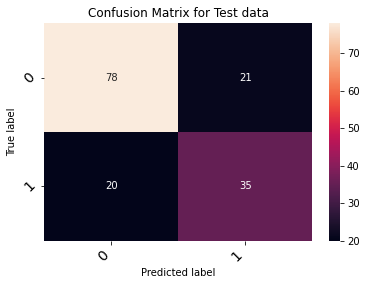

In [11]:
plot_conf_matrix(confusion_matrix(y_test, y_pred), "Test data")

In [12]:
# RandomForest with GridSearchCV

estimators = [10, 50, 100, 200, 500] 
max_depths = [3, 6, 10, 15, 20] 

grid_values = {'n_estimators': estimators, 'max_depth':max_depths}

clf = GridSearchCV(RandomForestClassifier(), grid_values, scoring='roc_auc', n_jobs=-1, verbose=10, cv=3)
clf.fit(X_train_ss, y_train)
best_n_estimators_value = clf.best_params_['n_estimators']
best_max_depth_value = clf.best_params_['max_depth']
best_score = clf.best_score_

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 2/3; 1/25] START max_depth=3, n_estimators=10...............................
[CV 2/3; 1/25] END max_depth=3, n_estimators=10;, score=0.842 total time=   0.0s
[CV 1/3; 1/25] START max_depth=3, n_estimators=10...............................
[CV 3/3; 3/25] START max_depth=3, n_estimators=100..............................
[CV 3/3; 1/25] START max_depth=3, n_estimators=10...............................
[CV 1/3; 1/25] END max_depth=3, n_estimators=10;, score=0.809 total time=   0.0s
[CV 3/3; 1/25] END max_depth=3, n_estimators=10;, score=0.814 total time=   0.0s
[CV 3/3; 2/25] START max_depth=3, n_estimators=50...............................
[CV 1/3; 4/25] START max_depth=3, n_estimators=200..............................
[CV 1/3; 3/25] START max_depth=3, n_estimators=100..............................
[CV 2/3; 2/25] START max_depth=3, n_estimators=50...............................
[CV 2/3; 4/25] START max_depth=3, n_estimators=2

In [13]:
acc_rf_grid = accuracy_score(y_test, clf.predict(X_test_ss))

print("Accuracy score is : ",acc_rf_grid)

Accuracy score is :  0.7467532467532467


In [14]:
roc_rf_grid = roc_auc_score(y_test, clf.predict(X_test_ss))

print("Accuracy score is : ",roc_rf_grid)

Accuracy score is :  0.7222222222222221


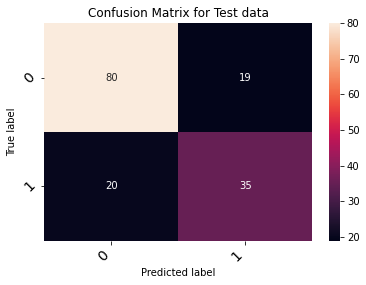

In [15]:
plot_conf_matrix(confusion_matrix(y_test, clf.predict(X_test_ss)), "Test data")

In [16]:
def plot_roc_curve(roc_auc_train, roc_auc_test):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr_tr, tpr_tr, 'g', label = 'Training AUC = %0.2f' % roc_auc_train)
    plt.plot(fpr_ts, tpr_ts, 'b', label = 'Testing AUC = %0.2f' % roc_auc_test)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

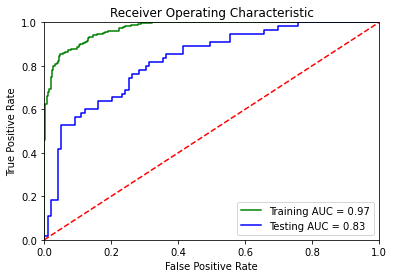

In [17]:
#Best hyper parameter 
clf = RandomForestClassifier(n_estimators=best_n_estimators_value, max_depth=best_max_depth_value)
clf.fit(X_train_ss, y_train)

y_pred_train = clf.predict_proba(X_train_ss)[:,1]
y_pred_test = clf.predict_proba(X_test_ss)[:,1]

   
#train data ROC
fpr_tr, tpr_tr, threshold = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_tr, tpr_tr)

#test data ROC
fpr_ts, tpr_ts, threshold = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_ts, tpr_ts)

#Plot ROC curve
plot_roc_curve(roc_auc_train, roc_auc_test)


In [18]:
# Compare both the models using Prettytable library    
x = PrettyTable()

x.field_names = ["Model", "n_estimators", "max_depth","Accuracy"]

x.add_row(["Random Forest w/o GridSearch", "default 10", "None", acc_rf])
x.add_row(["Random Forest with GridSearch", best_n_estimators_value, best_max_depth_value, acc_rf_grid])

print(x)

+-------------------------------+--------------+-----------+--------------------+
|             Model             | n_estimators | max_depth |      Accuracy      |
+-------------------------------+--------------+-----------+--------------------+
|  Random Forest w/o GridSearch |  default 10  |    None   | 0.7337662337662337 |
| Random Forest with GridSearch |     500      |     6     | 0.7467532467532467 |
+-------------------------------+--------------+-----------+--------------------+


## Logistic Regression

In [19]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_ss, y_train)

log_preds = logreg_model.predict(X_test_ss)
print("Accuracy: ", accuracy_score(y_test, log_preds))

NameError: name 'LogisticRegression' is not defined

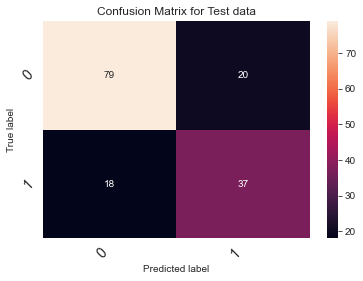

In [ ]:
plot_conf_matrix(confusion_matrix(y_test, log_preds), "Test data")

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.01, 0.03],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf = GridSearchCV(logreg_model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
best_clf = clf.fit(X,y)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_v

In [ ]:
best_clf.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

In [ ]:
fitted_model = LogisticRegression(C = 0.01, max_iter = 100,solver = "lbfgs").fit(X_train_ss, y_train)

y_test_preds = fitted_model.predict(X_test_ss)

In [ ]:
print("Accuracy is : ",accuracy_score(y_test, y_test_preds))

Accuracy is :  0.7857142857142857


In [ ]:
print("ROC-AUC score is : ",roc_auc_score(y_test, y_test_preds))

ROC-AUC score is :  0.7323232323232324


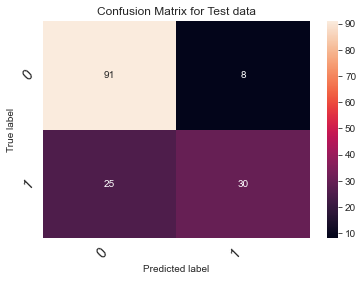

In [ ]:
plot_conf_matrix(confusion_matrix(y_test, y_test_preds), "Test data")

True Positives = 91
True Negatives = 30
False Positives = 8
False Negatives = 25

## LightGBM

In [ ]:
model  = lgbm.LGBMClassifier(objective = "binary")
model.fit(X_train_ss, y_train)

basic_preds = model.predict(X_test_ss)
print(accuracy_score(y_test, basic_preds))

0.7077922077922078


In [ ]:
from sklearn.model_selection import KFold
gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(X, y)

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

lgb_estimator = lgbm.LGBMClassifier(boosting_type='gbdt',  objective='binary', num_boost_round=2000, learning_rate=0.01, metric='auc')

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X, y)

print(lgb_model.best_params_, lgb_model.best_score_)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] num_iterations is set=2000, num_boost_round=2000 will be ignored. Current value: num_iterations=2000
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_

In [ ]:
lgb_model.best_params_

{'lambda_l1': 1.5,
 'lambda_l2': 0,
 'min_data_in_leaf': 100,
 'num_leaves': 31,
 'reg_alpha': 0.1}

In [ ]:
cv_lgbm_model = lgbm.LGBMClassifier(**lgb_model.best_params_)

In [ ]:

cv_lgbm_model.fit(X_train_ss, y_train)

preds_2 = cv_lgbm_model.predict(X_test_ss)
print("Accuracy is : ",accuracy_score(y_test, preds_2))

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
Accuracy is :  0.7532467532467533


In [ ]:
preds_2_prob = cv_lgbm_model.predict(X_test_ss)
print("ROC-AUC score is : ",roc_auc_score(y_test, preds_2_prob))

ROC-AUC score is :  0.7393939393939394


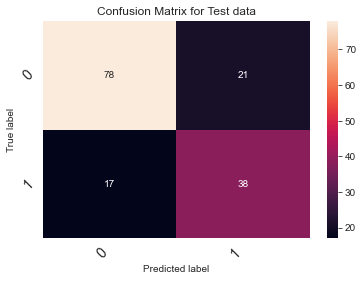

In [ ]:
plot_conf_matrix(confusion_matrix(y_test, preds_2), "Test data")

True Positives = 78
True Negatives = 38
False Positive = 21
False Negative = 17